In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
srate = 1000
time = np.arange(-3, 3, 1/srate)
pnts = len(time)
freqmod = np.exp(-time**2)*10+10
freqmod = freqmod + np.linspace(0, 10, pnts)
signal = np.sin(2*np.pi*(time+np.cumsum(freqmod)/srate))

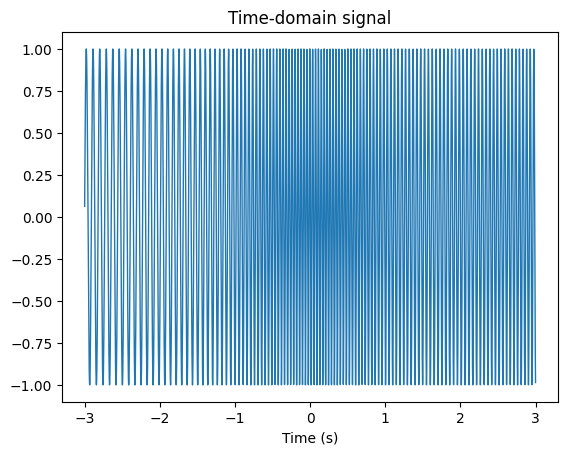

In [3]:
plt.plot(time, signal, linewidth=1)
plt.xlabel("Time (s)")
plt.title("Time-domain signal")
plt.show()

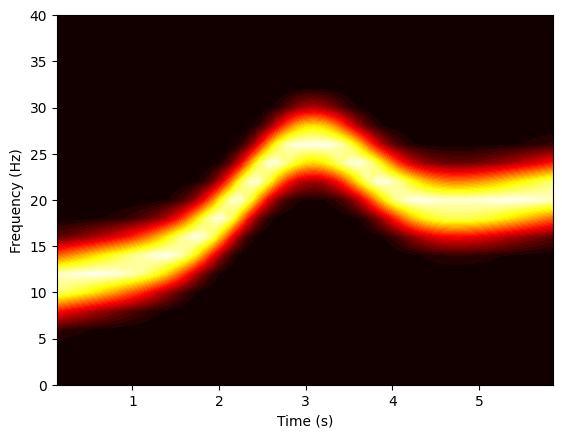

In [4]:
frex, timevec, pwr = scipy.signal.spectrogram(signal, window="hann", noverlap=150, nfft=500, fs=srate)

plt.contourf(timevec, frex, pwr, 40, cmap="hot")
plt.xlabel('Time (s)') 
plt.ylabel('Frequency (Hz)')
plt.ylim([0,40])
plt.show()


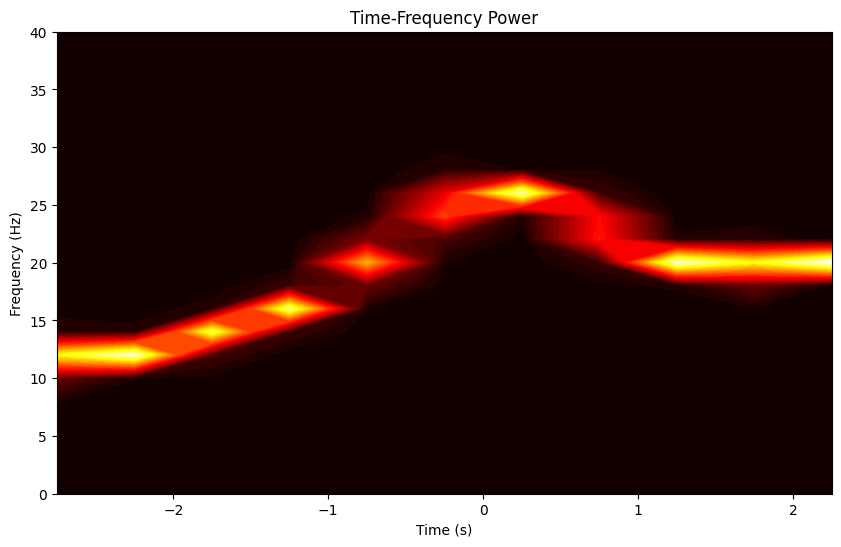

In [5]:
n = 500
hz = np.linspace(0, srate, n) 
tf = np.zeros(((pnts//n)-1, len(hz)))
tv = np.zeros((pnts//n)-1)

for i in range((pnts//n)-1):
    datasnip = signal[i * n:(i + 1) * n]
    
    pw = abs(scipy.fft.fft(datasnip))**2
    
    tf[i, :len(hz)] = pw[:len(hz)]
    
    tv[i] = np.mean(time[i * n:(i + 1) * n])

plt.figure(figsize=(10, 6))
plt.contourf(tv, hz, tf.T, 40, cmap="hot")
plt.ylim([0, 40])  
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Time-Frequency Power')
plt.show()